In [288]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
import sqlite3


In [289]:
data_path  = r"C:\Users\gaura\Desktop\DATA_VISUALIZATION_PYTHON\gym_members_exercise_tracking.csv"

In [290]:
df  = pd.read_csv(data_path)

In [291]:
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


In [292]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [293]:
df.shape

(973, 15)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [295]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [296]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [297]:
Total_member = df["Age"].count() 

In [298]:
print(Total_member)

973


Understanding Dataset

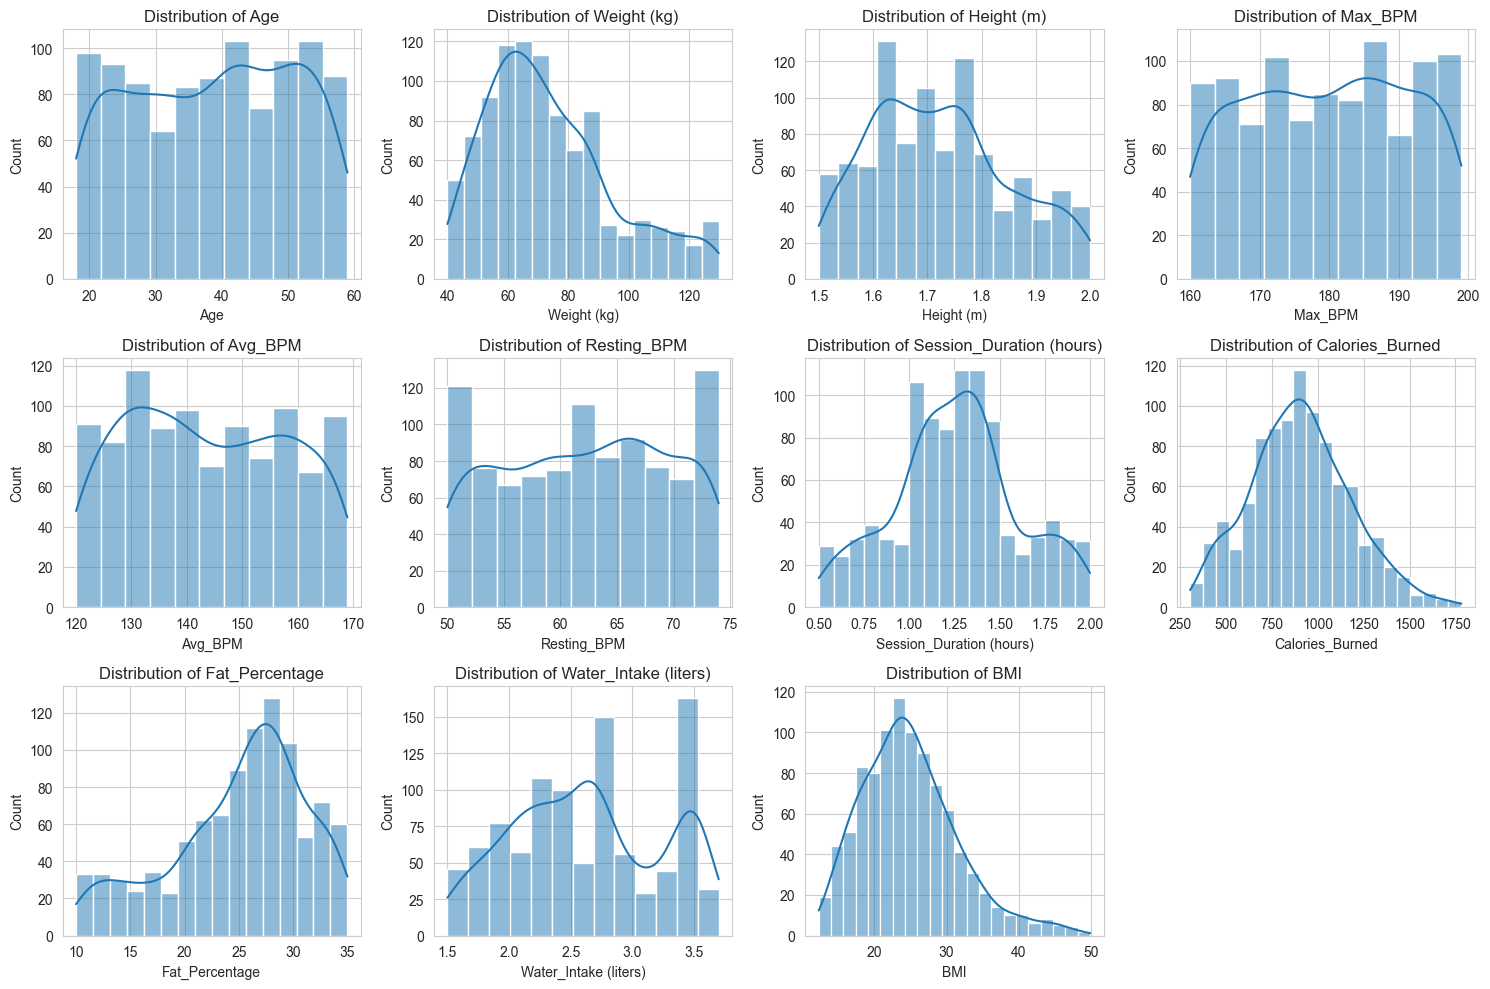

In [299]:

# List of continuous variables to plot histograms
continuous_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'BMI']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, 4, i)  # Adjust the grid size if needed
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
plt.show()

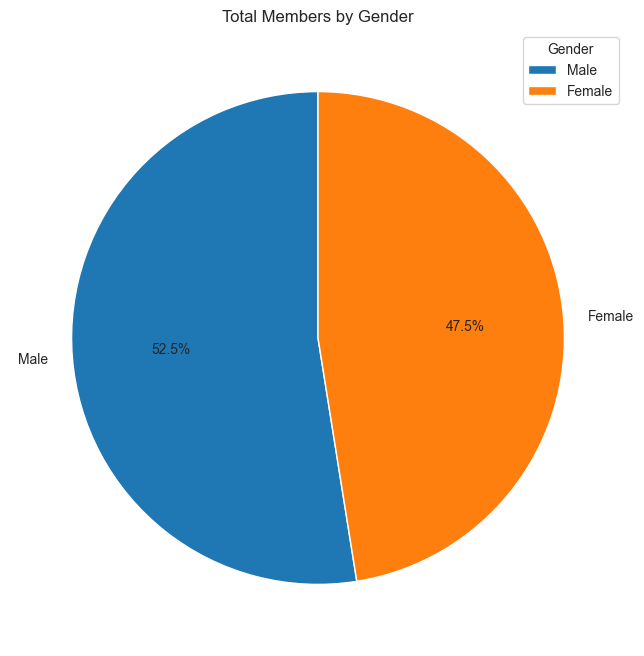

In [300]:
gender_counts = df['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Labels and Title
plt.legend(labels=gender_counts.index, title="Gender")
# Show the plot
plt.title("Total Members by Gender")

plt.show()

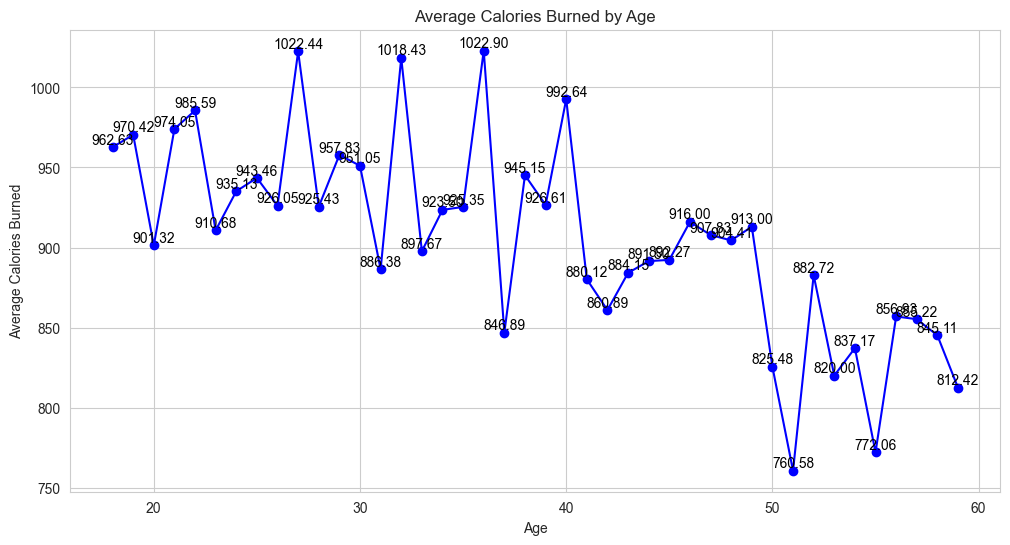

In [301]:
avg_calories_age = df.groupby("Age")["Calories_Burned"].mean()
plt.figure(figsize=(12, 6))
ax = avg_calories_age.plot(marker="o", linestyle="-", color="b")

# Add labels for each point
for i, value in enumerate(avg_calories_age):
    ax.text(avg_calories_age.index[i], value, f'{value:.2f}', color='black', ha='center', va='bottom')

plt.title("Average Calories Burned by Age")
plt.xlabel("Age")
plt.ylabel("Average Calories Burned")
plt.grid(True)
plt.show()

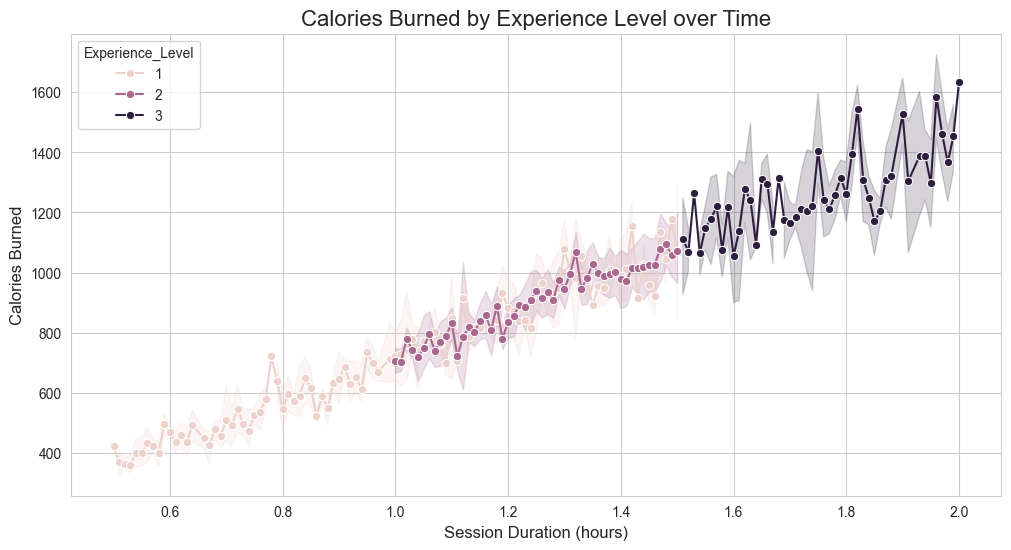

In [302]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Session_Duration (hours)', y='Calories_Burned', hue='Experience_Level', marker='o')
plt.title('Calories Burned by Experience Level over Time', fontsize=16)
plt.xlabel('Session Duration (hours)', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.show()

In [303]:
bins = [18, 30, 40, 50, 60 ]
labels = ["18-29", "30-39", "40-49", "50-60",]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

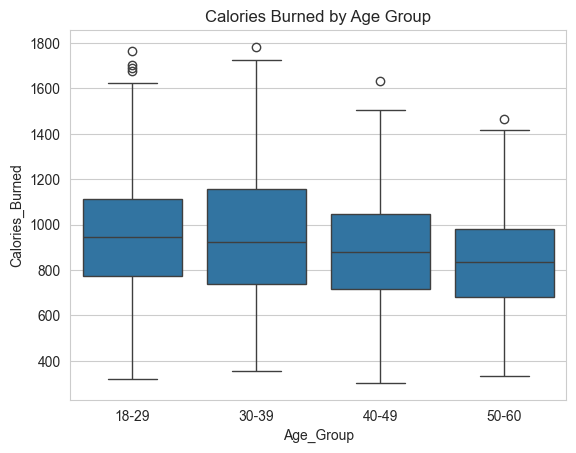

In [304]:
sns.boxplot(x="Age_Group", y="Calories_Burned", data=df)
plt.title("Calories Burned by Age Group")
plt.show()

In [305]:
df["Calories_per_Hour"] = df["Calories_Burned"] / df["Session_Duration (hours)"]

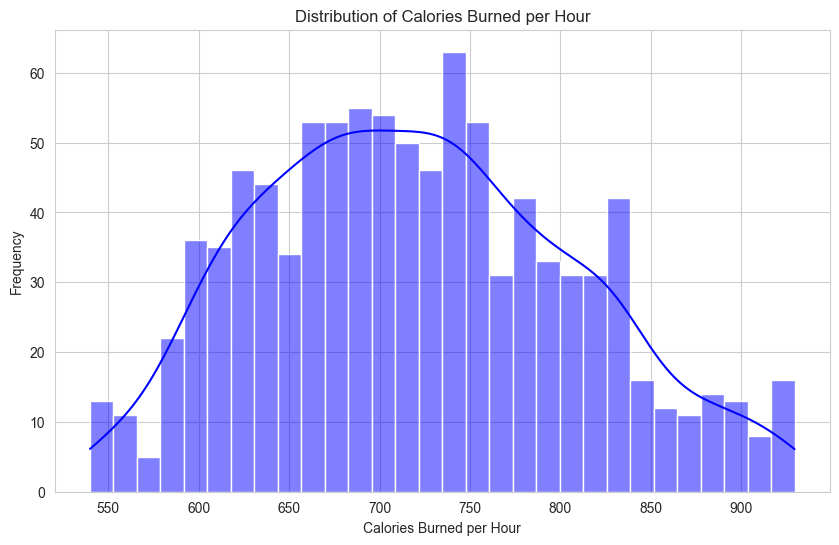

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["Calories_per_Hour"], bins=30, kde=True, color="blue")
plt.xlabel("Calories Burned per Hour")
plt.ylabel("Frequency")
plt.title("Distribution of Calories Burned per Hour")
plt.show()


In [307]:
def intensity(bpm):
    if bpm < 130:
        return "Low"
    elif 130 <= bpm < 150:
        return "Moderate"
    else:
        return "High"

df["Workout_Intensity"] = df["Avg_BPM"].apply(intensity)

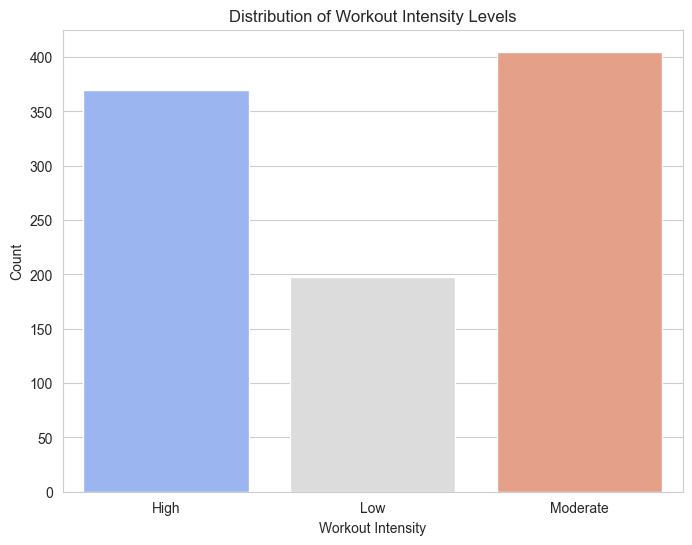

In [309]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Workout_Intensity", palette="coolwarm")
plt.title("Distribution of Workout Intensity Levels")
plt.xlabel("Workout Intensity")
plt.ylabel("Count")
plt.show()

In [353]:
class WorkoutSession:
    def __init__(self, session_data):
 
        self.session_data = session_data

    def calculate_water_per_hour(self):
        """Calculates water intake per hour."""
        try:
            water_per_hour = self.session_data["Water_Intake (liters)"] / self.session_data["Session_Duration (hours)"]
            self.session_data["Water_per_Hour"] = water_per_hour
        except ZeroDivisionError:
            self.session_data["Water_per_Hour"] = 0  
        return self.session_data["Water_per_Hour"]

    def classify_experience(self):
        """Classifies experience level."""
        experience_map = {1: "Beginner", 2: "Intermediate", 3: "Advanced"}
        experience_level = self.session_data.get("Experience_Level")
        if experience_level in experience_map:
            self.session_data["Experience_Category"] = experience_map[experience_level]
        else:
            self.session_data["Experience_Category"] = "Unknown"
        return self.session_data["Experience_Category"]

    def update_session_data(self):
        """Update session data with calculated fields."""
        self.calculate_water_per_hour()
        self.classify_experience()
        return self.session_data


workout_sessions = [WorkoutSession(session) for session in df.to_dict(orient='records')]

for workout in workout_sessions:
    updated_data = workout.update_session_data()
    df.loc[df.index[workout_sessions.index(workout)], 'Water_per_Hour'] = updated_data["Water_per_Hour"]
    df.loc[df.index[workout_sessions.index(workout)], 'Experience_Category'] = updated_data["Experience_Category"]

# Display updated DataFrame
print(df)


   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.69           1313.0         Yoga  ...   
1                      1.30            883.0         HIIT  ...   
2                      1.11            677.0       Cardio  ...   
3                      0.59            532.0     Strength  ...   
4                      0.64            556.0     Strength  ...   

   Workout_Intensity  Water_per_Hour  Experience_Category  Cluster  \
0               High        2.071006             Advanced        0   
1               Hi

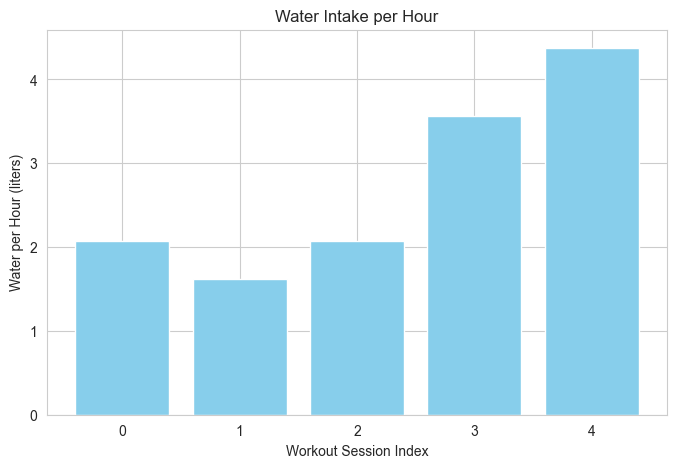

In [354]:
plt.figure(figsize=(8, 5))
plt.bar(df.index, df["Water_per_Hour"], color='skyblue')
plt.xlabel('Workout Session Index')
plt.ylabel('Water per Hour (liters)')
plt.title('Water Intake per Hour')
plt.xticks(df.index)
plt.show()

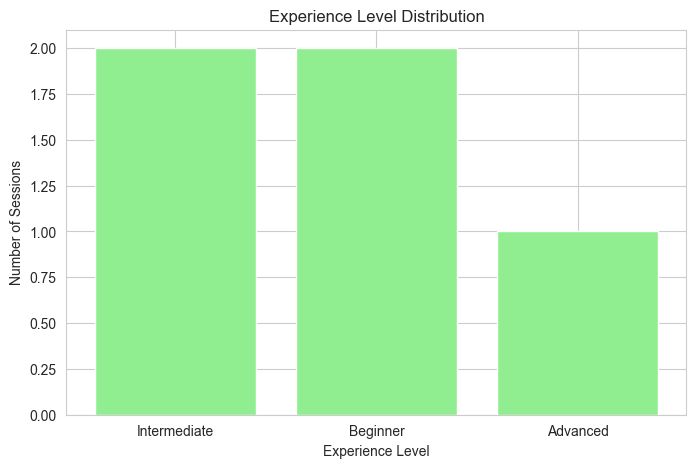

In [355]:
plt.figure(figsize=(8, 5))
experience_counts = df["Experience_Category"].value_counts()
plt.bar(experience_counts.index, experience_counts.values, color='lightgreen')
plt.xlabel('Experience Level')
plt.ylabel('Number of Sessions')
plt.title('Experience Level Distribution')
plt.show()

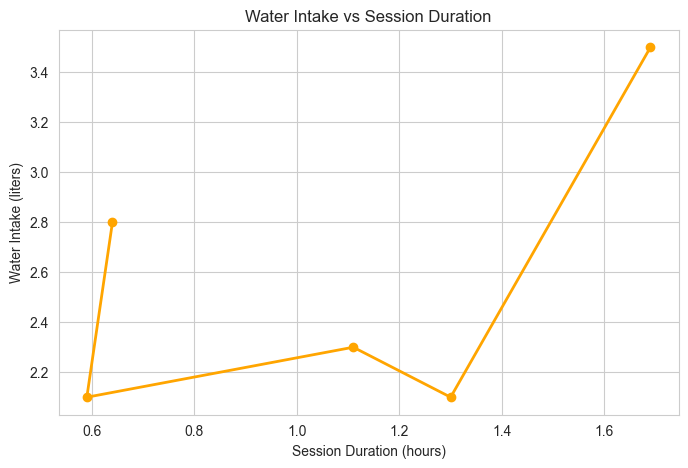

In [357]:
plt.figure(figsize=(8, 5))
plt.plot(df["Session_Duration (hours)"], df["Water_Intake (liters)"], marker='o', color='orange', linestyle='-', linewidth=2, markersize=6)

# Adding labels and title
plt.xlabel('Session Duration (hours)')
plt.ylabel('Water Intake (liters)')
plt.title('Water Intake vs Session Duration')

# Show the plot
plt.show()

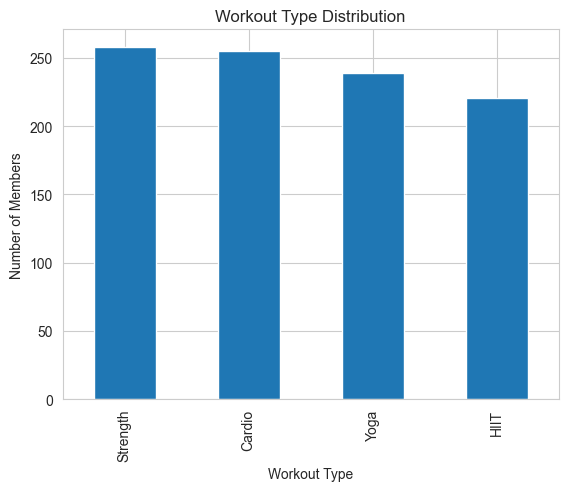

In [311]:
df["Workout_Type"].value_counts().plot(kind="bar")
plt.title("Workout Type Distribution")
plt.xlabel("Workout Type")
plt.ylabel("Number of Members")
plt.show()

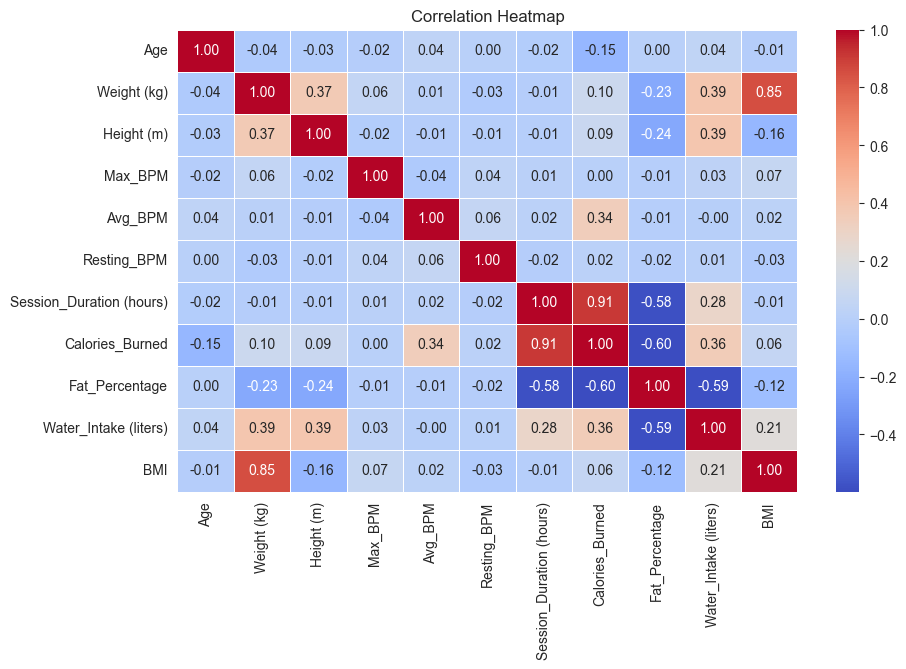

In [312]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'BMI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Classification and Visualization of BMI and Body Composition Classification System

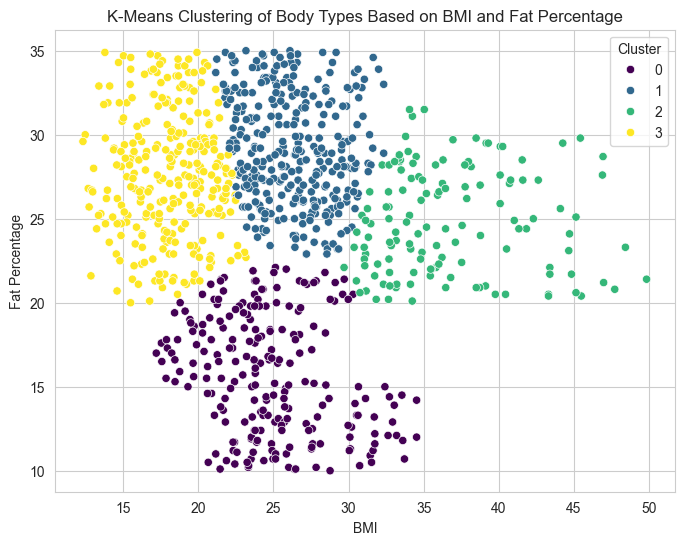

In [313]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['BMI', 'Fat_Percentage']])

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="BMI", y="Fat_Percentage", hue="Cluster", palette="viridis")
plt.title("K-Means Clustering of Body Types Based on BMI and Fat Percentage")
plt.xlabel("BMI")
plt.ylabel("Fat Percentage")
plt.show()


In [314]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def body_status(row):
    bmi = row['BMI']
    fat = row['Fat_Percentage']
    gender = row['Gender']
    
    # Define gender-specific fat percentage thresholds
    if gender == 'M':
        essential_fat = 5
        athlete = 13
        fitness = 17
        acceptable = 24 
    else:  # Female
        essential_fat = 13
        athlete = 20
        fitness = 24
        acceptable = 31
    
    # Underweight BMI
    if bmi < 18.5:
        if fat < essential_fat:
            return 'Severely Underweight'
        elif fat < athlete:
            return 'Skinny'
        else:
            return 'Skinny Fat'
    
    # Normal BMI
    elif 18.5 <= bmi < 25:
        if fat < essential_fat:
            return 'Under Fat'
        elif fat < athlete:
            return 'Athletic'
        elif fat < fitness:
            return 'Fitness'
        elif fat < acceptable:
            return 'Normal'
        else:
            return 'Skinny Fat'
    
    # Overweight BMI
    elif 25 <= bmi < 30:
        if fat < athlete:
            return 'Athletic/Muscular'
        elif fat < fitness:
            return 'Muscular'
        elif fat < acceptable:
            return 'Normal/Overweight'
        else:
            return 'Overfat'
    
    # Obese BMI
    else:  # bmi >= 30
        if fat < athlete:
            return 'Heavy Muscular'
        elif fat < fitness:
            return 'Muscular/Overweight'
        elif fat < acceptable:
            return 'Obese'
        else:
            return 'Severely Obese'

# Add BMI_Category column
df['BMI_Category'] = df['BMI'].apply(bmi_category)

# Add Body_Status column
df['Body_Status'] = df.apply(body_status, axis=1)

# Display the updated DataFrame with the new columns
print(df[['BMI', 'Fat_Percentage', 'Gender', 'BMI_Category', 'Body_Status']])

       BMI  Fat_Percentage  Gender BMI_Category        Body_Status
0    30.20            12.6    Male        Obese     Heavy Muscular
1    32.00            33.9  Female        Obese     Severely Obese
2    24.71            33.4  Female       Normal         Skinny Fat
3    18.41            28.8    Male  Underweight         Skinny Fat
4    14.39            29.2    Male  Underweight         Skinny Fat
..     ...             ...     ...          ...                ...
968  28.77            10.0    Male   Overweight  Athletic/Muscular
969  25.69            25.0    Male   Overweight  Normal/Overweight
970  19.50            18.8  Female       Normal           Athletic
971  37.74            28.2    Male        Obese              Obese
972  33.38            28.8    Male        Obese              Obese

[973 rows x 5 columns]


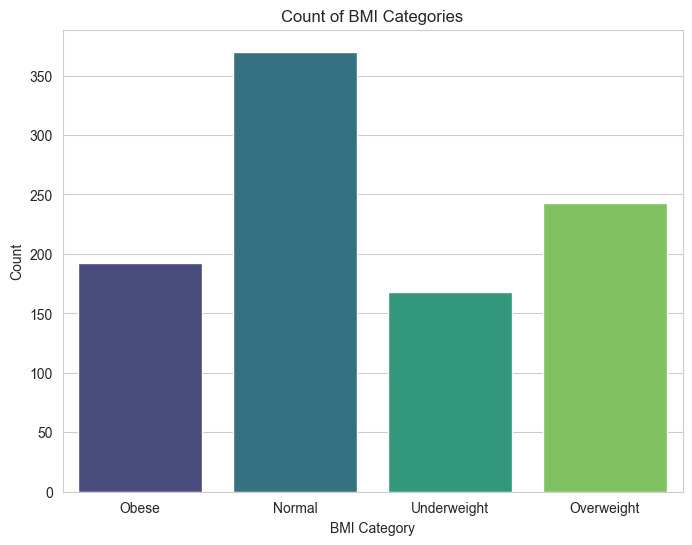

In [315]:
# Bar plot for BMI_Category counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BMI_Category', palette='viridis')
plt.title('Count of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

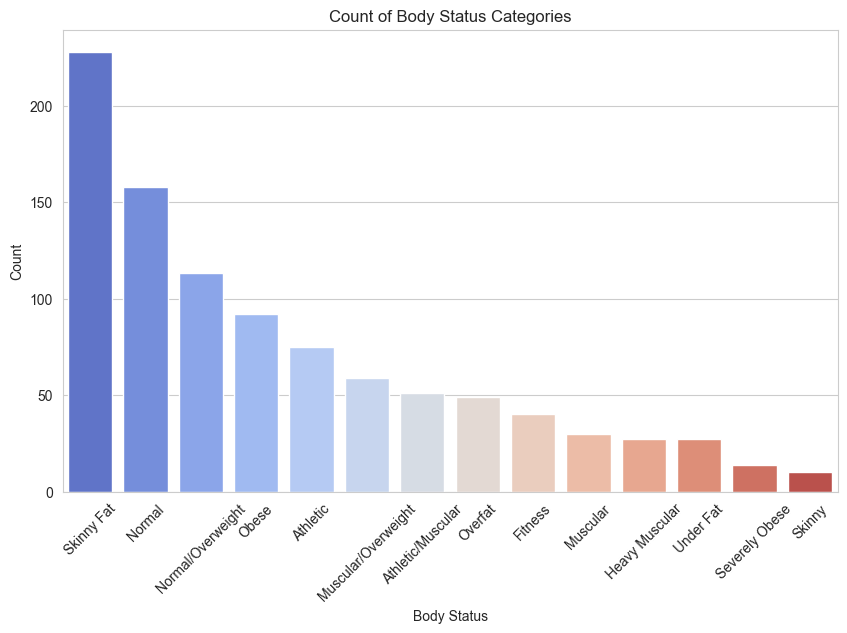

In [316]:
# Bar plot for Body_Status counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Body_Status', palette='coolwarm', order=df['Body_Status'].value_counts().index)
plt.title('Count of Body Status Categories')
plt.xlabel('Body Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [317]:
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Experience_Level,BMI,Age_Group,Calories_per_Hour,Workout_Intensity,Water_per_Hour,Experience_Category,Cluster,BMI_Category,Body_Status
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,...,3,30.20,50-60,776.923077,High,2.071006,Advanced,0,Obese,Heavy Muscular
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,...,2,32.00,40-49,679.230769,High,1.615385,Intermediate,1,Obese,Severely Obese
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,...,2,24.71,30-39,609.909910,Low,2.072072,Intermediate,1,Normal,Skinny Fat
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,...,1,18.41,18-29,901.694915,High,3.559322,Beginner,3,Underweight,Skinny Fat
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,...,1,14.39,30-39,868.750000,High,4.375000,Beginner,3,Underweight,Skinny Fat
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,...,3,20.55,50-60,701.886792,High,1.698113,Advanced,0,Normal,Athletic
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,...,2,23.76,30-39,929.530201,High,1.543624,Intermediate,0,Normal,Fitness
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,...,2,30.57,30-39,704.724409,Moderate,1.496063,Intermediate,1,Obese,Obese
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,...,2,32.34,18-29,698.058252,Low,2.524272,Intermediate,1,Obese,Obese
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,...,1,30.07,18-29,748.148148,Moderate,2.500000,Beginner,1,Obese,Obese


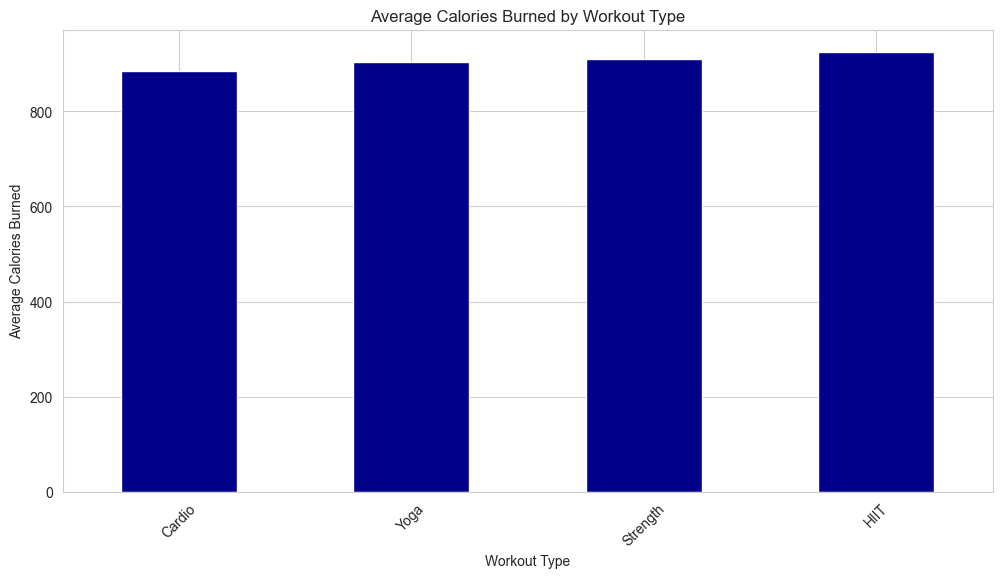

In [318]:
calories_per_workout = df.groupby("Workout_Type")["Calories_Burned"].mean().sort_values()
plt.figure(figsize=(12, 6))
calories_per_workout.plot(kind="bar", color="darkblue")
plt.title("Average Calories Burned by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Average Calories Burned")
plt.xticks(rotation=45)
plt.show()


In [319]:
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Experience_Level,BMI,Age_Group,Calories_per_Hour,Workout_Intensity,Water_per_Hour,Experience_Category,Cluster,BMI_Category,Body_Status
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,...,3,30.20,50-60,776.923077,High,2.071006,Advanced,0,Obese,Heavy Muscular
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,...,2,32.00,40-49,679.230769,High,1.615385,Intermediate,1,Obese,Severely Obese
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,...,2,24.71,30-39,609.909910,Low,2.072072,Intermediate,1,Normal,Skinny Fat
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,...,1,18.41,18-29,901.694915,High,3.559322,Beginner,3,Underweight,Skinny Fat
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,...,1,14.39,30-39,868.750000,High,4.375000,Beginner,3,Underweight,Skinny Fat
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,...,3,20.55,50-60,701.886792,High,1.698113,Advanced,0,Normal,Athletic
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,...,2,23.76,30-39,929.530201,High,1.543624,Intermediate,0,Normal,Fitness
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,...,2,30.57,30-39,704.724409,Moderate,1.496063,Intermediate,1,Obese,Obese
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,...,2,32.34,18-29,698.058252,Low,2.524272,Intermediate,1,Obese,Obese
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,...,1,30.07,18-29,748.148148,Moderate,2.500000,Beginner,1,Obese,Obese


In [320]:
def calculate_target_fat_percentage(row):
    gender = row['Gender'].strip().lower()
    
    # Standardize gender
    gender = 'M' if gender in ['male', 'm'] else 'F'
    
    # Define optimal fat percentage ranges
    optimal_fat_ranges = {
        'M': (6, 24),  # Male: Healthy range
        'F': (16, 30)  # Female: Healthy range
    }
    
    # Return the range based on gender
    return optimal_fat_ranges[gender]


def weight_fat_recommendations_based_on_status(row):
    current_bmi = row['BMI']
    current_weight = row['Weight (kg)']
    fat_percentage = row['Fat_Percentage']
    body_status_category = row['Body_Status']
    ideal_weight_lower = row['Ideal_Weight_Lower']
    ideal_weight_upper = row['Ideal_Weight_Upper']
    target_fat = row['Target_Fat_Percentage']
    target_fat = calculate_target_fat_percentage(row)

    
    recommendations = []
    gender = row['Gender']
    # Comprehensive recommendations based on all possible body status categories
    gender_label = "M" if gender == "Male" else "F"

    if body_status_category == 'Severely Underweight':
        recommendations.append(f"Severely Underweight ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Gain weight safely. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Skinny':
        recommendations.append(f"Skinny ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Build muscle and healthy fat. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Skinny Fat':
        recommendations.append(f"Skinny Fat ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Recompose: build muscle, reduce fat. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Under Fat':
        recommendations.append(f"Under Fat ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Increase essential fat. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Athletic':
        recommendations.append(f"Athletic ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Maintain fitness. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg,  Optimal Fat(%):{target_fat}% fat.")

    elif body_status_category == 'Fitness':
        recommendations.append(f"Fitness ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Keep balance. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Normal':
        recommendations.append(f"Normal ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Maintain healthy habits. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Athletic/Muscular':
        recommendations.append(f"Athletic/Muscular ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Maintain muscle. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Muscular':
        recommendations.append(f"Muscular ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Keep strength, monitor fat. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Normal/Overweight':
        recommendations.append(f"Normal/Overweight ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Lose fat, keep muscle. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Overfat':
        recommendations.append(f"Overfat ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Reduce fat sustainably. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Heavy Muscular':
        recommendations.append(f"Heavy Muscular ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Maintain muscle, check fat. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Muscular/Overweight':
        recommendations.append(f"Muscular/Overweight ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Lose fat, retain muscle. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Obese':
        recommendations.append(f"Obese ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Prioritize weight loss. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    elif body_status_category == 'Severely Obese':
        recommendations.append(f"Severely Obese ({gender_label}): BMI {current_bmi:.1f}, {fat_percentage}% fat. Medical guidance needed. Target: {ideal_weight_lower:.1f}-{ideal_weight_upper:.1f} kg, Optimal Fat(%): {target_fat}% fat.")

    return recommendations


In [321]:
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Experience_Level,BMI,Age_Group,Calories_per_Hour,Workout_Intensity,Water_per_Hour,Experience_Category,Cluster,BMI_Category,Body_Status
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,...,3,30.20,50-60,776.923077,High,2.071006,Advanced,0,Obese,Heavy Muscular
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,...,2,32.00,40-49,679.230769,High,1.615385,Intermediate,1,Obese,Severely Obese
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,...,2,24.71,30-39,609.909910,Low,2.072072,Intermediate,1,Normal,Skinny Fat
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,...,1,18.41,18-29,901.694915,High,3.559322,Beginner,3,Underweight,Skinny Fat
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,...,1,14.39,30-39,868.750000,High,4.375000,Beginner,3,Underweight,Skinny Fat
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,...,3,20.55,50-60,701.886792,High,1.698113,Advanced,0,Normal,Athletic
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,...,2,23.76,30-39,929.530201,High,1.543624,Intermediate,0,Normal,Fitness
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,...,2,30.57,30-39,704.724409,Moderate,1.496063,Intermediate,1,Obese,Obese
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,...,2,32.34,18-29,698.058252,Low,2.524272,Intermediate,1,Obese,Obese
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,...,1,30.07,18-29,748.148148,Moderate,2.500000,Beginner,1,Obese,Obese


In [322]:
def calculate_ideal_weight(row):
    height = row['Height (m)']
    gender = row['Gender']
    
    if gender == 'M':
        lower_weight = 18.5 * (height ** 2)
        upper_weight = 24.9 * (height ** 2)
    else:
        lower_weight = 18.5 * (height ** 2)
        upper_weight = 24.9 * (height ** 2)
    
    return lower_weight, upper_weight

In [323]:
# Calculate the ideal weight range for each user
df[['Ideal_Weight_Lower', 'Ideal_Weight_Upper']] = df.apply(calculate_ideal_weight, axis=1, result_type="expand")

# Calculate the target fat percentage for each user
df['Target_Fat_Percentage'] = df.apply(calculate_target_fat_percentage, axis=1)

# Add BMI_Category column
df['BMI_Category'] = df['BMI'].apply(bmi_category)

# Add Body_Status column
df['Body_Status'] = df.apply(body_status, axis=1)

# Adding recommendations for each user based on body status
df['Weight_Fat_Recommendations'] = df.apply(weight_fat_recommendations_based_on_status, axis=1)

# Display the DataFrame with personalized weight and fat percentage recommendations
print(df[['BMI', 'Fat_Percentage', 'Gender', 'BMI_Category', 'Body_Status', 'Ideal_Weight_Lower', 'Ideal_Weight_Upper', 'Target_Fat_Percentage', 'Weight_Fat_Recommendations']].head(10))

# Example: A User's current weight, BMI, fat percentage, and their personalized recommendations
user = df.iloc[0]  # Select a specific user
print(f"Recommendations for User {user.name}:")
for rec in user['Weight_Fat_Recommendations']:
    print(f"- {rec}")

     BMI  Fat_Percentage  Gender BMI_Category     Body_Status  \
0  30.20            12.6    Male        Obese  Heavy Muscular   
1  32.00            33.9  Female        Obese  Severely Obese   
2  24.71            33.4  Female       Normal      Skinny Fat   
3  18.41            28.8    Male  Underweight      Skinny Fat   
4  14.39            29.2    Male  Underweight      Skinny Fat   
5  20.55            15.5  Female       Normal        Athletic   
6  23.76            21.3    Male       Normal         Fitness   
7  30.57            30.6  Female        Obese           Obese   
8  32.34            28.9    Male        Obese           Obese   
9  30.07            29.7    Male        Obese           Obese   

   Ideal_Weight_Lower  Ideal_Weight_Upper Target_Fat_Percentage  \
0            54.09585            72.81009               (6, 24)   
1            43.30665            58.28841              (16, 30)   
2            50.97860            68.61444              (16, 30)   
3            53.

In [324]:
pd.set_option('display.max_colwidth', None)  # Ensures full text is displayed
print(df['Weight_Fat_Recommendations'])

0            [Heavy Muscular (M): BMI 30.2, 12.6% fat. Maintain muscle, check fat. Target: 54.1-72.8 kg, Optimal Fat(%): (6, 24)% fat.]
1              [Severely Obese (F): BMI 32.0, 33.9% fat. Medical guidance needed. Target: 43.3-58.3 kg, Optimal Fat(%): (16, 30)% fat.]
2      [Skinny Fat (F): BMI 24.7, 33.4% fat. Recompose: build muscle, reduce fat. Target: 51.0-68.6 kg, Optimal Fat(%): (16, 30)% fat.]
3       [Skinny Fat (M): BMI 18.4, 28.8% fat. Recompose: build muscle, reduce fat. Target: 53.5-72.0 kg, Optimal Fat(%): (6, 24)% fat.]
4       [Skinny Fat (M): BMI 14.4, 29.2% fat. Recompose: build muscle, reduce fat. Target: 59.3-79.8 kg, Optimal Fat(%): (6, 24)% fat.]
                                                                     ...                                                               
968                  [Athletic/Muscular (M): BMI 28.8, 10.0% fat. Maintain muscle. Target: 56.0-75.4 kg, Optimal Fat(%): (6, 24)% fat.]
969            [Normal/Overweight (M): BMI 25.7,

In [325]:
df.to_csv('updated_dataset.csv', index=False)

In [326]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Age_Group',
       'Calories_per_Hour', 'Workout_Intensity', 'Water_per_Hour',
       'Experience_Category', 'Cluster', 'BMI_Category', 'Body_Status',
       'Ideal_Weight_Lower', 'Ideal_Weight_Upper', 'Target_Fat_Percentage',
       'Weight_Fat_Recommendations'],
      dtype='object')

In [330]:
df = pd.read_csv("updated_dataset.csv")

In [331]:
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Workout_Intensity,Water_per_Hour,Experience_Category,Cluster,BMI_Category,Body_Status,Ideal_Weight_Lower,Ideal_Weight_Upper,Target_Fat_Percentage,Weight_Fat_Recommendations
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,...,High,2.071006,Advanced,0,Obese,Heavy Muscular,54.09585,72.81009,"(6, 24)","['Heavy Muscular (M): BMI 30.2, 12.6% fat. Maintain muscle, check fat. Target: 54.1-72.8 kg, Optimal Fat(%): (6, 24)% fat.']"
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,...,High,1.615385,Intermediate,1,Obese,Severely Obese,43.30665,58.28841,"(16, 30)","['Severely Obese (F): BMI 32.0, 33.9% fat. Medical guidance needed. Target: 43.3-58.3 kg, Optimal Fat(%): (16, 30)% fat.']"
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,...,Low,2.072072,Intermediate,1,Normal,Skinny Fat,50.97860,68.61444,"(16, 30)","['Skinny Fat (F): BMI 24.7, 33.4% fat. Recompose: build muscle, reduce fat. Target: 51.0-68.6 kg, Optimal Fat(%): (16, 30)% fat.']"
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,...,High,3.559322,Beginner,3,Underweight,Skinny Fat,53.46500,71.96100,"(6, 24)","['Skinny Fat (M): BMI 18.4, 28.8% fat. Recompose: build muscle, reduce fat. Target: 53.5-72.0 kg, Optimal Fat(%): (6, 24)% fat.']"
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,...,High,4.375000,Beginner,3,Underweight,Skinny Fat,59.27585,79.78209,"(6, 24)","['Skinny Fat (M): BMI 14.4, 29.2% fat. Recompose: build muscle, reduce fat. Target: 59.3-79.8 kg, Optimal Fat(%): (6, 24)% fat.']"
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,...,High,1.698113,Advanced,0,Normal,Athletic,52.21440,70.27776,"(16, 30)","['Athletic (F): BMI 20.6, 15.5% fat. Maintain fitness. Target: 52.2-70.3 kg, Optimal Fat(%):(16, 30)% fat.']"
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,...,High,1.543624,Intermediate,0,Normal,Fitness,54.73040,73.66416,"(6, 24)","['Fitness (M): BMI 23.8, 21.3% fat. Keep balance. Target: 54.7-73.7 kg, Optimal Fat(%): (6, 24)% fat.']"
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,...,Moderate,1.496063,Intermediate,1,Obese,Obese,42.18185,56.77449,"(16, 30)","['Obese (F): BMI 30.6, 30.6% fat. Prioritize weight loss. Target: 42.2-56.8 kg, Optimal Fat(%): (16, 30)% fat.']"
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,...,Low,2.524272,Intermediate,1,Obese,Obese,69.62660,93.71364,"(6, 24)","['Obese (M): BMI 32.3, 28.9% fat. Prioritize weight loss. Target: 69.6-93.7 kg, Optimal Fat(%): (6, 24)% fat.']"
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,...,Moderate,2.500000,Beginner,1,Obese,Obese,62.63360,84.30144,"(6, 24)","['Obese (M): BMI 30.1, 29.7% fat. Prioritize weight loss. Target: 62.6-84.3 kg, Optimal Fat(%): (6, 24)% fat.']"


In [332]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('gym_data.db')
df.to_sql('gym_members', conn, if_exists='replace', index=False)
conn.close()

In [335]:
query = "SELECT * FROM gym_members LIMIT 5;"
df = pd.read_sql(query, conn)
print("First 5 records:")
print(df)

First 5 records:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.69           1313.0         Yoga  ...   
1                      1.30            883.0         HIIT  ...   
2                      1.11            677.0       Cardio  ...   
3                      0.59            532.0     Strength  ...   
4                      0.64            556.0     Strength  ...   

   Workout_Intensity  Water_per_Hour  Experience_Category  Cluster  \
0               High        2.071006             Advanced        0   
1

In [336]:
query_oldest = "SELECT * FROM gym_members ORDER BY age DESC LIMIT 1;"
df_oldest = pd.read_sql(query_oldest, conn)
print("Oldest member:")
print(df_oldest)

Oldest member:
   Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   59   Male         53.9        1.75      168      135           69   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.48            989.0     Strength  ...   

   Workout_Intensity  Water_per_Hour  Experience_Category  Cluster  \
0           Moderate        1.891892         Intermediate        3   

   BMI_Category Body_Status  Ideal_Weight_Lower Ideal_Weight_Upper  \
0   Underweight  Skinny Fat            56.65625           76.25625   

   Target_Fat_Percentage  \
0                (6, 24)   

                                                                                                          Weight_Fat_Recommendations  
0  ['Skinny Fat (M): BMI 17.6, 21.6% fat. Recompose: build muscle, reduce fat. Target: 56.7-76.3 kg, Optimal Fat(%): (6, 24)% fat.']  

[1 rows x 27 columns]


In [342]:
query_obese = """
SELECT *
FROM gym_members
WHERE Body_Status = 'Obese';
"""

# Read the query result into a DataFrame
df_obese = pd.read_sql(query_obese, conn)
print("Obese members:")
print(df_obese)

Obese members:
    Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0    40  Female         69.7        1.51      189      141           64   
1    28    Male        121.7        1.94      185      127           52   
2    28    Male        101.8        1.84      169      136           64   
3    20    Male        117.7        1.81      196      161           54   
4    29    Male        120.9        1.78      197      168           65   
..  ...     ...          ...         ...      ...      ...          ...   
87   55    Male        118.6        1.72      163      168           67   
88   22    Male        117.3        1.68      172      134           57   
89   18    Male        118.6        1.64      188      134           67   
90   32    Male        126.4        1.83      198      146           62   
91   46    Male         88.7        1.63      166      146           66   

    Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                

In [343]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Age_Group',
       'Calories_per_Hour', 'Workout_Intensity', 'Water_per_Hour',
       'Experience_Category', 'Cluster', 'BMI_Category', 'Body_Status',
       'Ideal_Weight_Lower', 'Ideal_Weight_Upper', 'Target_Fat_Percentage',
       'Weight_Fat_Recommendations'],
      dtype='object')

In [347]:
query = """
SELECT Workout_Type, AVG(Max_BPM) AS Avg_Max_BPM
FROM gym_members
GROUP BY Workout_Type
ORDER BY Avg_Max_BPM DESC
LIMIT 5
"""

df_top_workouts_max_bpm = pd.read_sql_query(query, conn)

print(df_top_workouts_max_bpm)

  Workout_Type  Avg_Max_BPM
0         Yoga   180.606695
1         HIIT   180.113122
2       Cardio   179.874510
3     Strength   179.027132


In [363]:
query = """
SELECT Weight_Fat_Recommendations
FROM gym_members
WHERE gender = 'Male' AND body_status = 'Obese';
"""

df_reccomendation = pd.read_sql_query(query, conn)

print(df_reccomendation)

                                                                                         Weight_Fat_Recommendations
0   ['Obese (M): BMI 32.3, 28.9% fat. Prioritize weight loss. Target: 69.6-93.7 kg, Optimal Fat(%): (6, 24)% fat.']
1   ['Obese (M): BMI 30.1, 29.7% fat. Prioritize weight loss. Target: 62.6-84.3 kg, Optimal Fat(%): (6, 24)% fat.']
2   ['Obese (M): BMI 35.9, 26.4% fat. Prioritize weight loss. Target: 60.6-81.6 kg, Optimal Fat(%): (6, 24)% fat.']
3   ['Obese (M): BMI 38.2, 28.1% fat. Prioritize weight loss. Target: 58.6-78.9 kg, Optimal Fat(%): (6, 24)% fat.']
4   ['Obese (M): BMI 33.4, 28.4% fat. Prioritize weight loss. Target: 59.9-80.7 kg, Optimal Fat(%): (6, 24)% fat.']
..                                                                                                              ...
77  ['Obese (M): BMI 40.1, 25.9% fat. Prioritize weight loss. Target: 54.7-73.7 kg, Optimal Fat(%): (6, 24)% fat.']
78  ['Obese (M): BMI 41.6, 28.5% fat. Prioritize weight loss. Target: 52

In [364]:
conn.close()
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Workout_Intensity,Water_per_Hour,Experience_Category,Cluster,BMI_Category,Body_Status,Ideal_Weight_Lower,Ideal_Weight_Upper,Target_Fat_Percentage,Weight_Fat_Recommendations
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,...,High,2.071006,Advanced,0,Obese,Heavy Muscular,54.09585,72.81009,"(6, 24)","['Heavy Muscular (M): BMI 30.2, 12.6% fat. Maintain muscle, check fat. Target: 54.1-72.8 kg, Optimal Fat(%): (6, 24)% fat.']"
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,...,High,1.615385,Intermediate,1,Obese,Severely Obese,43.30665,58.28841,"(16, 30)","['Severely Obese (F): BMI 32.0, 33.9% fat. Medical guidance needed. Target: 43.3-58.3 kg, Optimal Fat(%): (16, 30)% fat.']"
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,...,Low,2.072072,Intermediate,1,Normal,Skinny Fat,50.97860,68.61444,"(16, 30)","['Skinny Fat (F): BMI 24.7, 33.4% fat. Recompose: build muscle, reduce fat. Target: 51.0-68.6 kg, Optimal Fat(%): (16, 30)% fat.']"
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,...,High,3.559322,Beginner,3,Underweight,Skinny Fat,53.46500,71.96100,"(6, 24)","['Skinny Fat (M): BMI 18.4, 28.8% fat. Recompose: build muscle, reduce fat. Target: 53.5-72.0 kg, Optimal Fat(%): (6, 24)% fat.']"
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,...,High,4.375000,Beginner,3,Underweight,Skinny Fat,59.27585,79.78209,"(6, 24)","['Skinny Fat (M): BMI 14.4, 29.2% fat. Recompose: build muscle, reduce fat. Target: 59.3-79.8 kg, Optimal Fat(%): (6, 24)% fat.']"
